# **Deep Learning - Focus on Transformer**

## 1. 인트로

### 1-1. Attention 의 등장 배경

RNN의 한계 :
- 장기 의존성 문제
- vanishing gradient

LSTM의 한계:
- 계산이 복잡하고 시간이 오래 걸림
- 여전히 긴 문장에 있어서는 vanishing gradient가 발생함

seq2seq의 한계 :
- 고정된 크기의 context vector를 사용하면서, 입력 문장이 길어질수록 일부 입력 데이터들의 소실이 발생하는 문제가 발생함
- 디코더는 출력하는 단어에 상관 없이 똑같은 컨텍스트 벡터만을 참고

### 1-2. ATTENTION

핵심 아이디어 : 결과를 만들 때 입력값의 모든 부분을 동일하게 보지 말고 지금 가장 중요한 부분에 더 높은 가중치를 부여해서 참고하자

seq2seq 방식과 비교했을 떄, 출력의 시점마다 새로운 컨텍스트 벡터를 동적으로 계산함

#### Attention 의 과정
1. 입력을 벡터 형태로 변환하여 각 요소를 수치화함
2. 각 요소 별 중요도 점수를 산출함 
    - 관련도 채점 (score) : 단어들 사이의 관계나 유사성을 측정해 관련도 점수 측정
    - 중요도 배분 (softmax) : 중요도를 0과 1사이의 값으로 변환해 모든 단어의 중요도를 합치면 1이 되도록 조정함
3. 중요도에 따른 입력 정보 조합 : 2단계의 가중치에 따라 특정 단어 정보에 더 집중, 낮은 단어 무시를 진행하면서 최종 결과를 도출

#### Attention 의 장점
1. 시간 경과에 대한 유연성
    - RNN은 고질적인 장기 의존성 문제를 가지지만 Attention 은 모든 단어에서 다른 모든 단어로 직접적인 연결고리를 만들어 아무리 멀리 떨어진 단어라도 정보 손실 없이 명확하게 파악
2. 공간에 대한 유연성
    - CNN 은 고정된 필터를 사용해 이미지의 지역적인 부분만 볼 수 있지만, 어텐션은 이미지의 모든 픽셀이 다른 모든 픽셀과 지겁 연결되어 전체 이미지의 전역적인 관계 학습
3. 병렬화 
    - RNN은 순차계산이라서 속도가 느리지만, 어텐션은 self-attention에서 모든 단어의 관계를 한번에 독립적으로 계산할 수 있음

### 1-3. Attention is All You Need

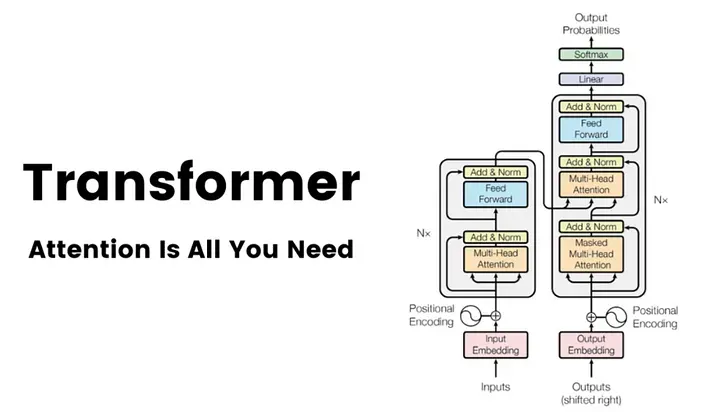

Transformer 구조를 처음 발표한 논문    
-> 어텐션을 쓰던 딥러닝 모델들이 대부분 self-attention 을 채택함

논문에 들어있는 내용
1. 논문 배경 : 느리고 장기 의존성 문제가 있는 순차적 계산 구조를 아예 제거하고 인코더부터 디코더까지 오직 attention을 사용하는 모델을 만들자
2. Transformer의 등장
3. Recurrence 및 convolution 이 필수가 아님을 증명함
4. 파급효과
    - LLM의 탄생 (트랜스포머 -> BERT 와 GPT의 기반)
    - NLP 평정
    - 타 분야로의 확장: 컴퓨터 비전, 음성 처리, 신약 개발 등

#### Transformer

RNN의 순차적인 계산 방식을 완전히 버리고, 오직 어테션만으로 문장의 의미와 구조를 파악하는 모델    
- Attention 기반 Seq2Seq 모델은 RNN을 사용해서 인코더와 디코더를 구현
- Transformer 에서는 Attention 만으로 인코더와 디코더를 구현함

핵심 기술
1. Self - Attention
2. Multi-Head Attention
3. Positional Encoding

## 2. Self-Attention

### 2-1. Query, Key, Value

Q : Query   
쿼리는 질문 또는 요청으로 내가 알고 싶거나 초점을 맞추고 있는 대상

K : Key    
키는 검색 대상이 되는 모든 정보들이 달고 있는 '이름표' 또는 '색인', 쿼리는 이 키들과 자신을 비교하며 얼마나 관련이 있는지 확인함

V : Value    
류는 키와 한 쌍으로 묶여 있는 '실제 내용물'. 쿼리와 키의 관련도 계산이 끝나고, 가장 관련성이 높다고 판단된 키가 선택되면, 모델은 그 키에 해당하는 밸류를 가져와 사용

### 2-2. Cross-Attention vs. Self-Attention

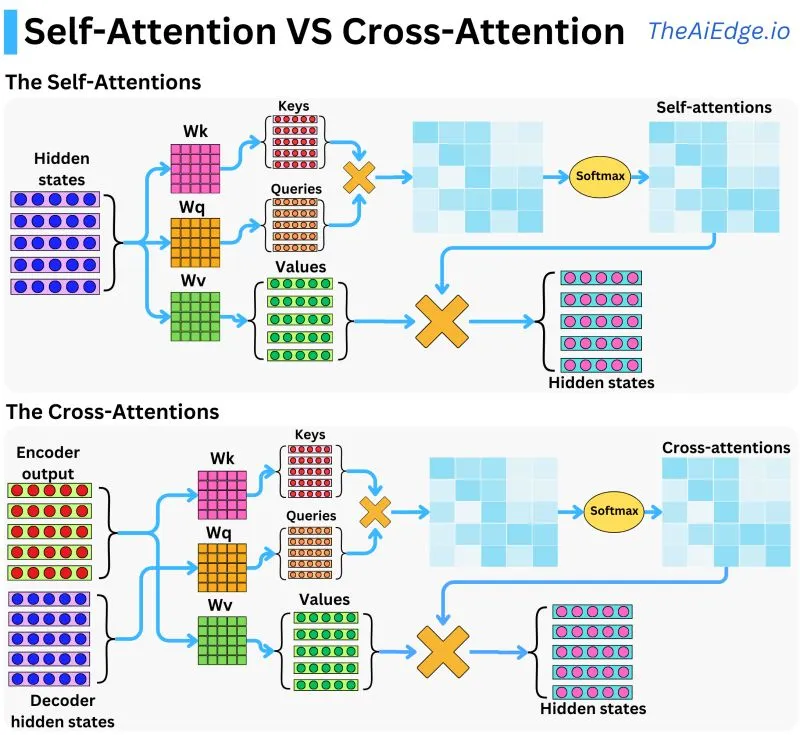

#### 기존 Attention in Seq2Seq (Cross-Attention) 

하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 메커니즘

참조 대상 : 서로 다른 시퀀스 (인코더 ↔ 디코더)

핵심 과정
1. 쿼리 만들기
2. key, value 불러오기
3. 유사도 계싼
4. 가중치 weighted sum 계산
5. 디코더가 다음 단어를 예측 (오픈북 시험처럼)

#### Self-Attention

문장 자체를 뜯어보며 내부 관계를 파악

한 문장 내 모든 단어끼리 서로의 관계를 계산

참고 대상 : 동일한 시퀀스 (문장 내부 <-> 문장 내부)

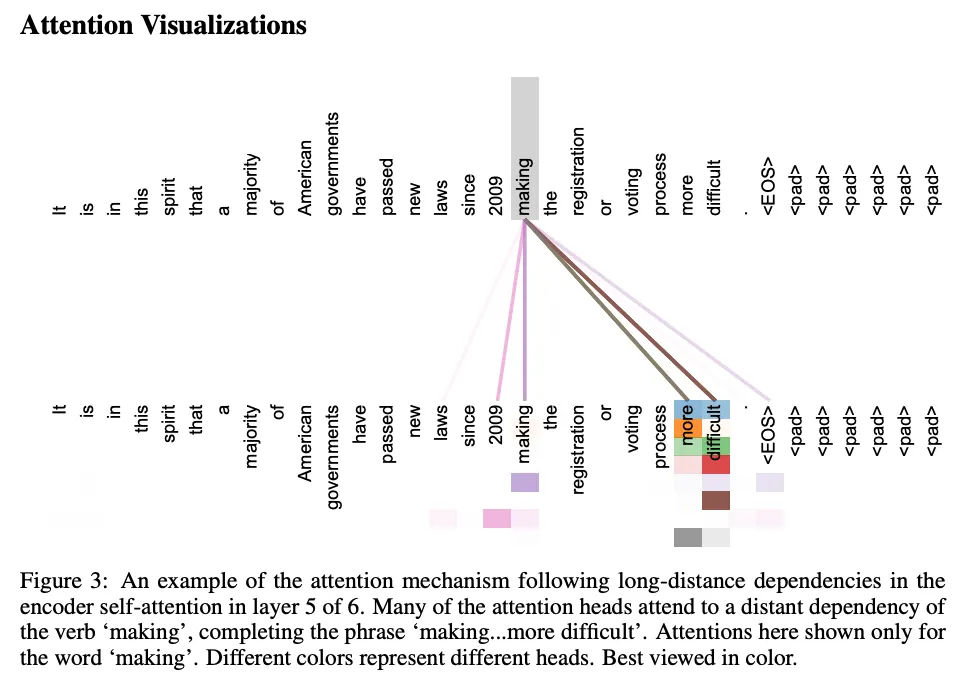

핵심 과정
1. 단어의 프로필 만들기 (벡터 임베딩)
2. 단어 간 관계 점수 계산 (내정 및 정렬 함수)
3. 중요도 배분 (소프트맥스 & 어텐션 가중치)
4. 문맥이 풍부해진 새로운 프로필 생성

### 2-3. Scaled Dot-Product Attention

Dot-Product Attention : attention score를 계산하는 가장 기본적인 방법 중 하나, 쿼리와 키벡터를 내적하여 유사도를 구함

문제점 : 벡터의 차원이 커질수록 내적의 결과가 너무 커지거나 작아지게 되는 문제가 존재함     
극단적인 attention socre가 softmax 함수에 들어가게 되면, vanishing gradient가 발생하게 됨

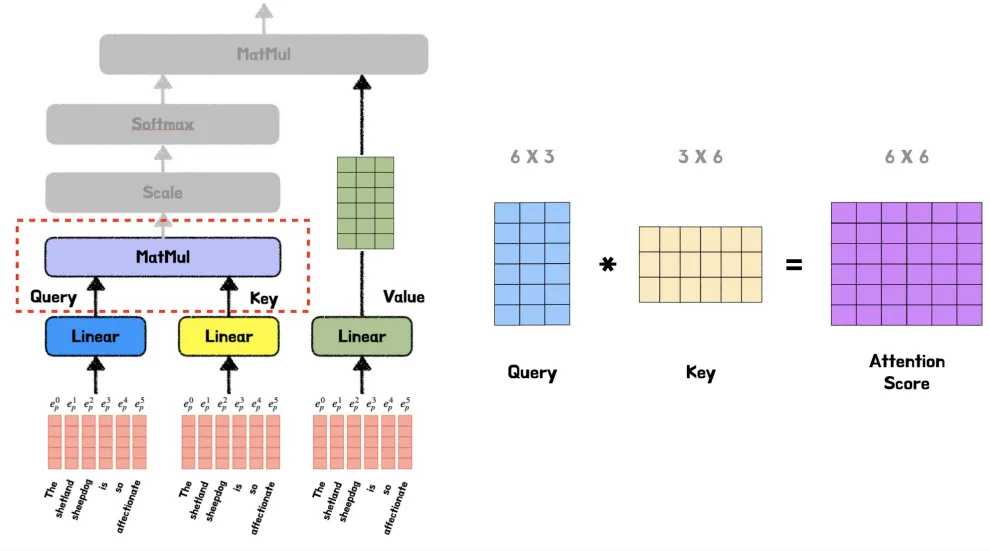

Scaled Dot-Product Attention : 트랜스포머 방식의 표준

바뀐 과정
1. 쿼리 벡터와 모든 키 벡터를 각각 내적하여 유사도 계산을 진행
2. 계산된 값을 $\sqrt{d_K}$ 로 나누어 스케일링을 진행
3. 스케일링을 진행한 값에 Softmax 함수를 적용하여 총합이 1인 Attention Weight 산출
4. 이 가중치를 밸류(V) 벡터에 곱하여 최종 결과값을 계산

- 한 번의 나눗셈으로 계산된 내적 값이 과도하게 증가하는 것을 방지하여 안정적인 분포를 형성
- 이는 Softmax 함수가 안정적으로 학습을 진행할 수 있도록 합

## 3. Multi-Head Attention

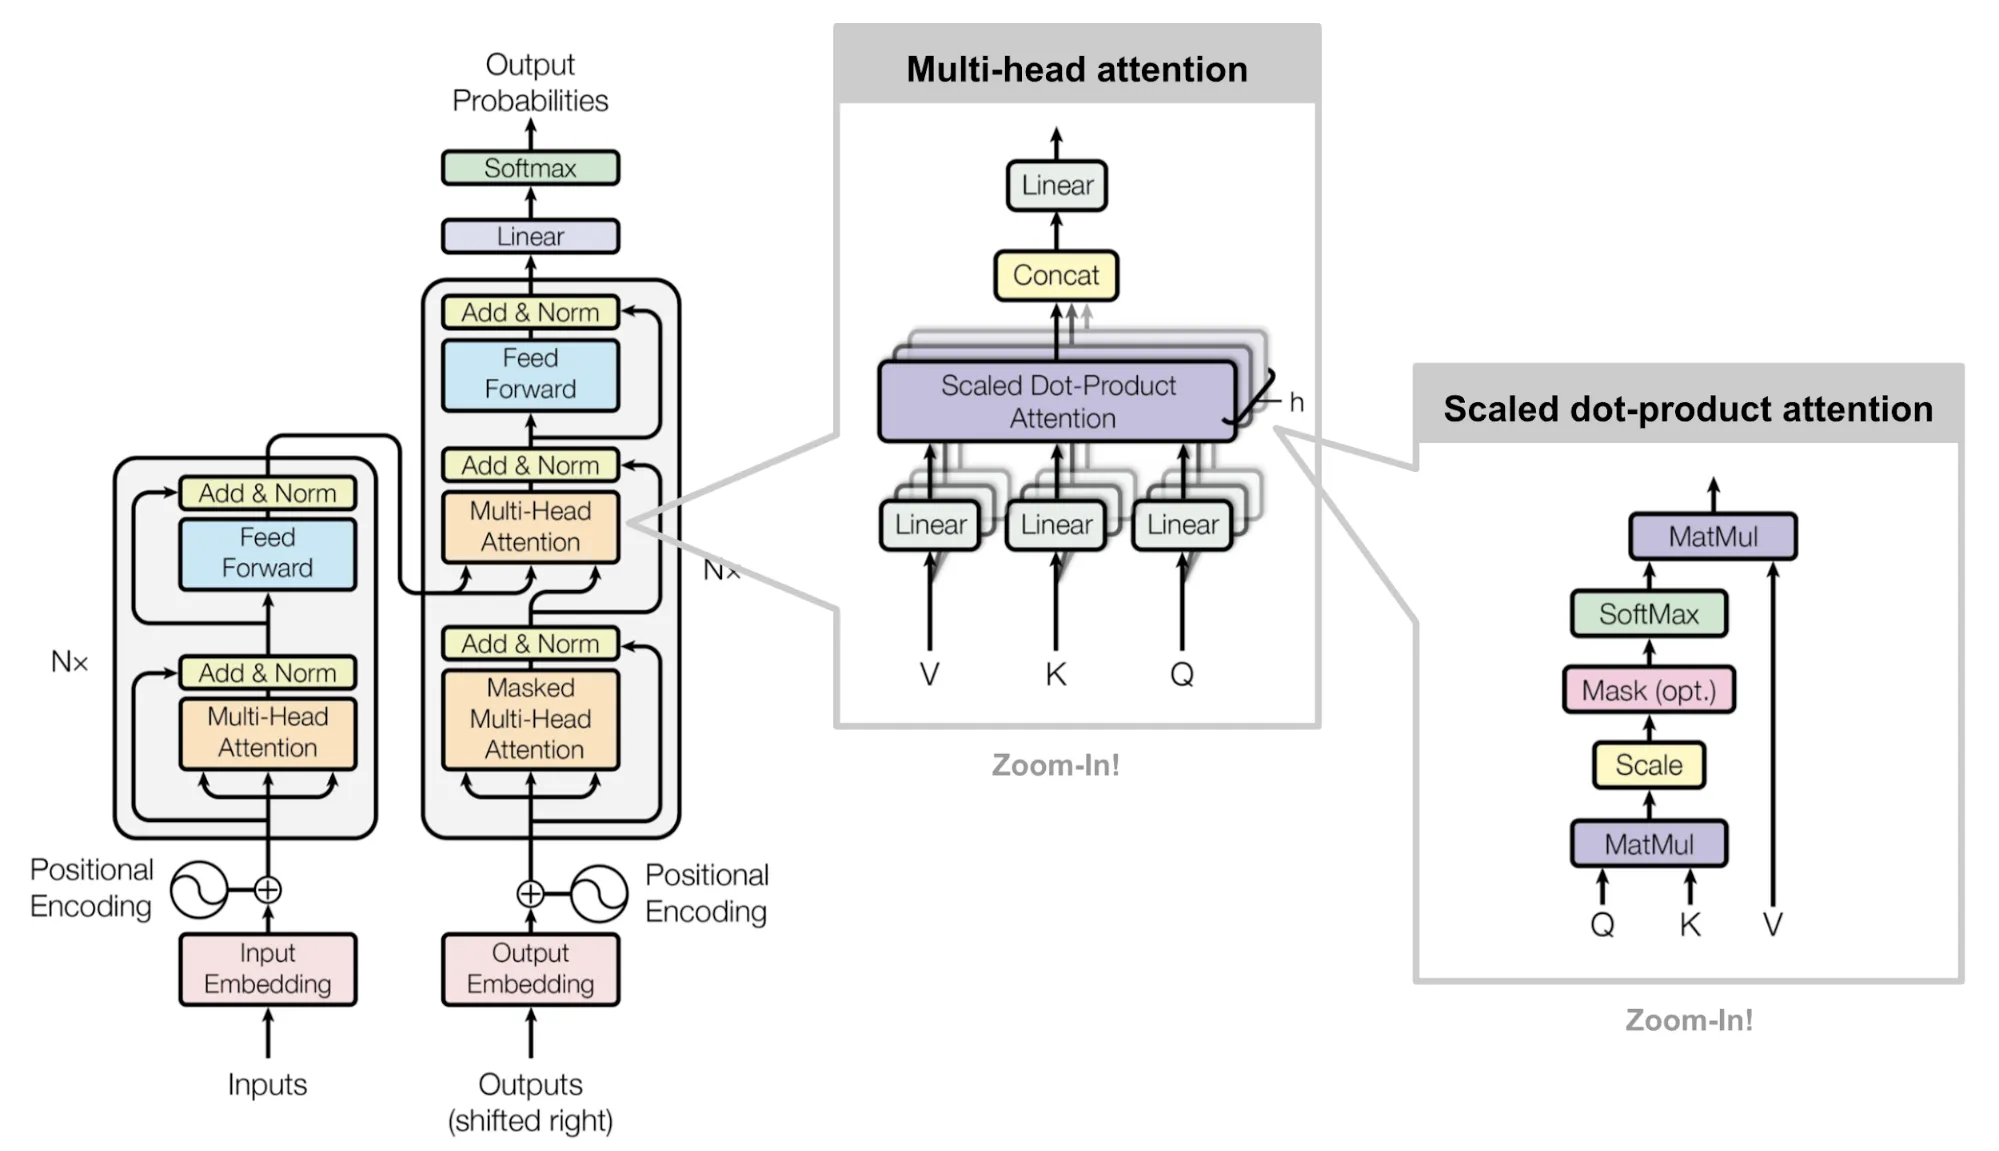

인코더 (왼쪽 박스 내부)에서 Multi-Head Attention이 한 번, 디코더 (오른쪽 박스 내부)에서 Multi-Head Attention이 두 번 일어난다

### 3-1. Why Multi-Head Attention?

#### single-head attention

- 문장 내 단어들 간의 관계를 파악하기 위해 하나의 가중치 행렬$(W^Q, W^K, W^V)$만을 학습하고 번역에 사용함
- 작동 방식 : 512차원의 입력 벡터 → 이 벡터를 위한 어탠션 가중치 분포 계산 → 가중합 하여 새로운 512차원의 벡터를 출력
- 한계 : 각 단어 간의 중요한 관계를 놓쳐버릴 수 있음

#### Multi-Head Attention

-  한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 병렬로 학습
- 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나누고, Attention 스코어를 병렬로 여러 번 계산

### Multi-Head Attention 작동 방식

1. 분할 (Projection) - 8명의 헤드에 단어 벡터 할당

2. 병렬 어텐션 계산 - 각 헤드들이 각자 분석 수행
- 점수 계산 (Score)
- 크기 조절 (Scale)
- 가중치 변환 (Softmax)
- 가중합 (Weighted Sum)

3. 결합 및 최종 투영 - 전문가들의 분석 결과 취합
- 결합 (Concatenate)
- 최종 투영 (Final Projection)



## 4. Transformer 전체 아키텍처

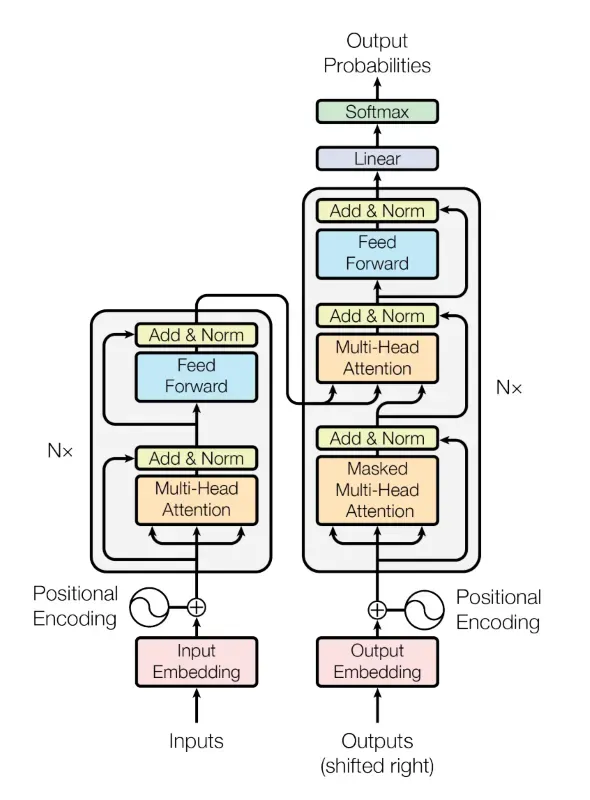

### 4-1. 트랜스포머의 전처리 단계

1. 토큰화 : 입력 텍스트를 모델이 처리할 수 있는 단위(tokens)로 나누는 첫 번째 단계
- 각 토큰은 하나의 단어에 해당
- 문장 부호 역시 별도의 토큰을 가짐
- 일부 단어는 하나 이상의 토큰으로 나뉠 수 있음



2. 임베딩 (Embedding) : 인간의 언어(단어)를 컴퓨터의 언어(숫자)로 번역
- 토큰화된 각 단위(토큰)는 임베딩 단계에서 숫자의 벡터로 변환
    - 벡터의 길이가 벡터의 차원이 됨
- 단어의 의미를 공간적으로 표현
    - 유사한 단어는 유사한 숫자

3. Positional Encoding : 단어들의 순서 정보를 임베딩 벡터에 추가하는 단계

단어들은 문법적 측면이나, 문맥을 파악하기 위해서나 등장한 순서가 매우 중요

 순서 정보, 즉 위치 정보를 제공하기 위해 positional encoding을 사용

작동 방식 : 각 단어의 임베딩 좌표에 일관된 순서(consistent sequence)를 따르는 다른 숫자를 추가하여 순서 정보를 기록     
같은 단어라도 문장에서 차지하는 위치가 다르면 최종적으로 다른 좌표(수정된 임베딩)를 가지게 되며, 이는 모델이 순서를 학습할 수 있도록 도움

### 4-2. 트랜스포머의 Encoder와 Decoder

#### Encoder

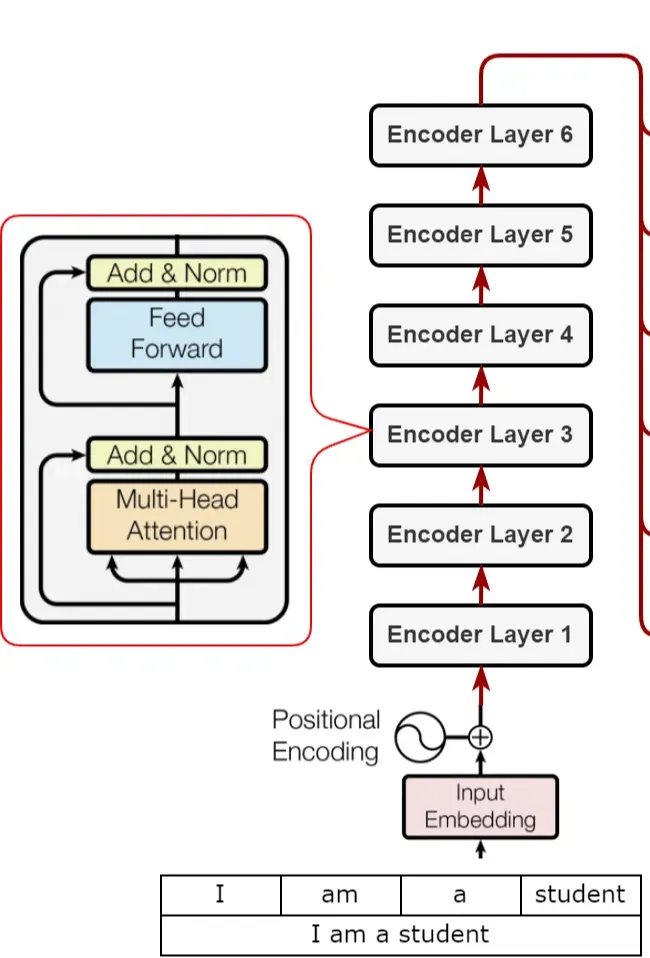

- 입력 문장을 이해하고 요약된 의미 벡터로 변환하는 역할
- 전처리 과정(토큰화, 임베딩, Positional Encoding) 및 인코더 레이어(Multi-Head Attention, Feed Forward Layer)로 구성


인코더 레이어
1. Multi-Head Attention
2. Feed-Forward layer
- 입력 벡터의 차원을 확장하고 비선형 변환(ex: ReLU)을 적용하여 새로운 표현을 생성하는 신경망 구조

Add & Norm = Layer Normalization (층 정규화) = 입력 벡터의 평균과 분산을 사용해서 정규화하는 것

#### Decoder

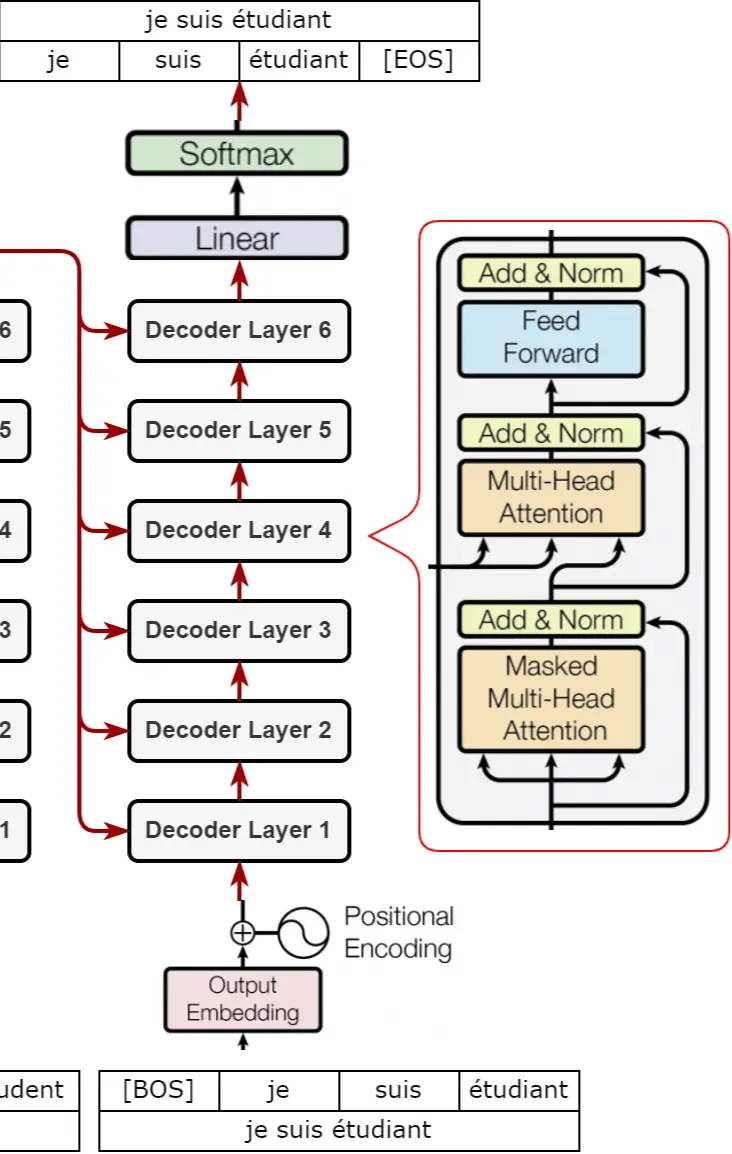

Decoder는 Encoder가 분석한 입력 문장의 의미 벡터를 받아서 출력 문장을 순차적으로 생성하는 역할

전처리 과정, 디코더 레이어, 선형 레이어와 소프트맥스 레이어로 이루어져 있음

디코더 레이어의 구성

1. Masked Multi-Head Attention
- 미래 시점의 단어 정보를 참고하지 못하도록 마스크(mask)를 적용하는 어텐션 메커니즘
- Look-Ahead Mask(Causal Mask)를 사용하여 현재 단어보다 오른쪽(미래)에 있는 토큰의 어텐션 값을 0으로 만들어 무시

2. Encoder-Decoder Attention (Cross-Attention)
- 디코더가 인코더의 출력을 참고하면서 현재 생성 중인 단어를 입력 문장의 의미와 연결하는 과정

3. Feed-Forward Layer

### 4-3. 전체 모델 및 데이터 흐름

1. 입력준비 : 문장을 [의미+위치] 벡터로 바꾸기
- 임베딩
- 포지셔널 임베딩



2. 인코더 : 입력 문장의 문맥적 깊이 이해하기
- 셀프 어텐션
- 관계 점수 계산
    - Q와 K의 내적(Dot Product)으로 단어 간 관계 점수를 구하고, Softmax 로 확률 분포(가중치)로 변환
- 가중합
    - 계산된 가중치를 V 벡터에 곱하고 모두 더하여 새로운 벡터 생성
- 멀티헤드


3. 디코더: 번역 문장을 한 단어씩 생성하기
